In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import scienceplots

from nanonets.utils import sinusoidal_voltages, fft

plt.style.use(["science","bright"])

In [25]:
N_PARTICLES     = 9
N_ELECTRODES    = 8
N_PERIODS       = 100
FREQ_MHZ        = 16.0
topo            = {"Nx": N_PARTICLES, "Ny": N_PARTICLES,
                   "e_pos" : [[int((N_PARTICLES-1)/2),0], [0,0], [N_PARTICLES-1,0],
                              [0,int((N_PARTICLES-1)/2)], [N_PARTICLES-1,int((N_PARTICLES)/2)], 
                              [0,N_PARTICLES-1], [N_PARTICLES-1,N_PARTICLES-1],
                              [int((N_PARTICLES)/2),(N_PARTICLES-1)]],
                   "electrode_type" : ['constant']*N_ELECTRODES}
AMPLITUDE   = [0.02] + [0.0]*(N_ELECTRODES-1)
FREQUENCY   = [FREQ_MHZ * 1e6] + [0.0]*(N_ELECTRODES-1)
dt          = 1/(40 * FREQUENCY[0]) 
T_sim       = N_PERIODS / FREQUENCY[0]
N_steps     = int(np.ceil(T_sim / dt))
time, volt  = sinusoidal_voltages(N_steps, topo, AMPLITUDE, FREQUENCY, time_step=dt)

In [26]:
df  = pd.read_csv("Nx=9_Ny=9_Ne=8.csv")
x   = df['E0'].values*1000
y   = df['Observable'].values*1e-6
y_e = df['Error'].values*1e-6

Text(0.5, 0, '$t$ [$\\mu$s]')

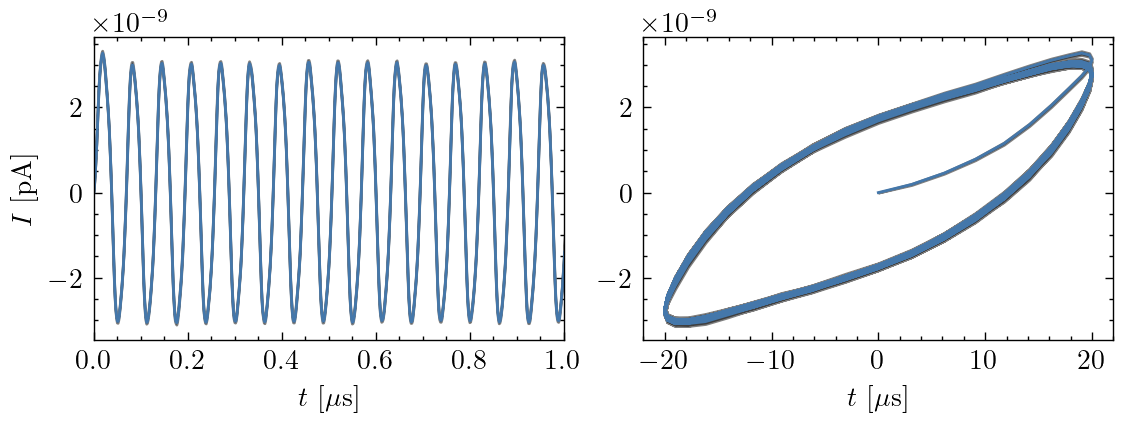

In [27]:
EQ_STEPS = 0

fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*1.6)
fig.set_figheight(fig.get_figheight()*0.8)
ax  = fig.add_subplot(1,2,1)
ax.plot(time[:-1]*1e6, y)
ax.fill_between(time[:-1]*1e6, y-y_e, y+y_e, alpha=0.5, color='black')
ax.set_xlabel("$t$ [$\mu$s]")
ax.set_ylabel("$I$ [pA]")
ax.set_xlim(0,1)
ax  = fig.add_subplot(1,2,2)
ax.plot(x[EQ_STEPS:], y[EQ_STEPS:])
ax.fill_between(x[EQ_STEPS:], y[EQ_STEPS:]-y_e[EQ_STEPS:], y[EQ_STEPS:]+y_e[EQ_STEPS:], alpha=0.5, color='black')
ax.set_xlabel("$t$ [$\mu$s]")

Text(0, 0.5, '$FFT$')

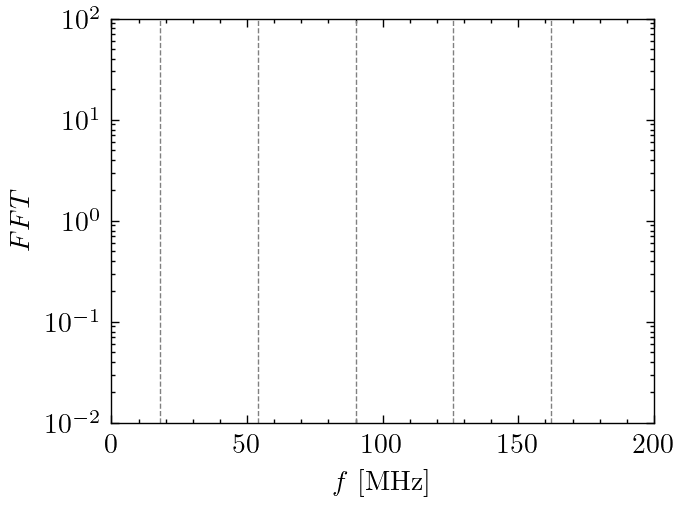

In [28]:
xf, yf  = fft(y[EQ_STEPS:], dt=dt, n_padded=100)
fig, ax = plt.subplots(dpi=200)
for i in [1,3,5,7,9]:
    ax.vlines(i*18.0, 0.01, 100, color='grey', ls='--', lw=.5)

ax.plot(xf*1e-6, yf)
ax.set_yscale('log')
ax.set_xlim(0.0,200)
ax.set_ylim(0.01,100)
ax.set_xlabel("$f$ [MHz]")
ax.set_ylabel("$FFT$")